# Uploading images to huggingface

In [1]:
from dotenv import load_dotenv
import pandas as pd
from PIL import Image
import random
import os

load_dotenv()

True

In [2]:
# from huggingface_hub import login
# login(token=os.environ["token"])

In [ ]:
image_folder = 'images/test_data_v2'

all_images = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

sampled_images = random.sample(all_images, min(500, len(all_images)))

df = pd.DataFrame({
    "filename": sampled_images,
    "filepath": [os.path.join(image_folder, img) for img in sampled_images]
})

df["image"] = df["filepath"].apply(lambda x: Image.open(x))

df

,filename,filepath,image
0,d1d7c7863ee449f197b243a519ad12df.jpg,images/test_data_v2/d1d7c7863ee449f197b243a519...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,34c8045286374bb992162f3a0e9e1f45.jpg,images/test_data_v2/34c8045286374bb992162f3a0e...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,b0c0323f9e2c404b957afd25a86e036e.jpg,images/test_data_v2/b0c0323f9e2c404b957afd25a8...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,d2538cb6a3e54f4db6b96cdfbfc81471.jpg,images/test_data_v2/d2538cb6a3e54f4db6b96cdfbf...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,252ac9f5829044fdb5d9ef0f8941865d.jpg,images/test_data_v2/252ac9f5829044fdb5d9ef0f89...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
...,...,...,...
495,b56f67a7af114462bb0447fb5338f4a5.jpg,images/test_data_v2/b56f67a7af114462bb0447fb53...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
496,9bc69d450ce34cbbb76fe85895518c0a.jpg,images/test_data_v2/9bc69d450ce34cbbb76fe85895...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
497,150f625ccc924e8894e656260aa082d7.jpg,images/test_data_v2/150f625ccc924e8894e656260a...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
498,6883bf1ead9747e9ac74a775f5cdca8b.jpg,images/test_data_v2/6883bf1ead9747e9ac74a775f5...,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [4]:
df.to_csv("images/image.csv")

In [23]:
# Move the pictures used
import shutil

dest = "images/used/"
os.makedirs(dest, exist_ok=True)

for file in df["filepath"]:
    if os.path.exists(file):
        shutil.copy(file, dest)

In [1]:
import os
# import faiss
import torch
# import skimage
# import requests
# import pinecone
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
import matplotlib.pyplot as plt
# from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer

/home/fisokuhle/Desktop/multi-modal_image_retrieval_system/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_model_info(model_ID, device):
# Save the model to device
	model = CLIPModel.from_pretrained(model_ID).to(device)
 	# Get the processor
	processor = CLIPProcessor.from_pretrained(model_ID)
# Get the tokenizer
	tokenizer = CLIPTokenizer.from_pretrained(model_ID)
       # Return model, processor & tokenizer
	return model, processor, tokenizer
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
# Define the model ID
model_ID = "openai/clip-vit-base-patch32"
# Get model, processor & tokenizer
model, processor, tokenizer = get_model_info(model_ID, device)

In [3]:
def get_single_text_embedding(text): 
    inputs = tokenizer(text, return_tensors = "pt")
    text_embeddings = model.get_text_features(**inputs)
 	# convert the embeddings to numpy array
    embedding_as_np = text_embeddings.cpu().detach().numpy()

    return embedding_as_np

In [16]:
df = pd.read_csv("images/image.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df["image"] = df["filepath"].apply(lambda x: Image.open(x))
df

,filename,filepath,image
0,d1d7c7863ee449f197b243a519ad12df.jpg,images/test_data_v2/d1d7c7863ee449f197b243a519...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,34c8045286374bb992162f3a0e9e1f45.jpg,images/test_data_v2/34c8045286374bb992162f3a0e...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,b0c0323f9e2c404b957afd25a86e036e.jpg,images/test_data_v2/b0c0323f9e2c404b957afd25a8...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,d2538cb6a3e54f4db6b96cdfbfc81471.jpg,images/test_data_v2/d2538cb6a3e54f4db6b96cdfbf...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,252ac9f5829044fdb5d9ef0f8941865d.jpg,images/test_data_v2/252ac9f5829044fdb5d9ef0f89...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
...,...,...,...
495,b56f67a7af114462bb0447fb5338f4a5.jpg,images/test_data_v2/b56f67a7af114462bb0447fb53...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
496,9bc69d450ce34cbbb76fe85895518c0a.jpg,images/test_data_v2/9bc69d450ce34cbbb76fe85895...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
497,150f625ccc924e8894e656260aa082d7.jpg,images/test_data_v2/150f625ccc924e8894e656260a...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
498,6883bf1ead9747e9ac74a775f5cdca8b.jpg,images/test_data_v2/6883bf1ead9747e9ac74a775f5...,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [17]:
type(df["image"][0])

PIL.JpegImagePlugin.JpegImageFile

In [18]:
def get_single_image_embedding(my_image):
    image = processor(
            text = None,
            images = my_image,
            return_tensors="pt"
            )["pixel_values"].to(device)
    embedding = model.get_image_features(image)
    # convert the embeddings to numpy array
    embedding_as_np = embedding.cpu().detach().numpy()
    return embedding_as_np

def get_all_images_embedding(df, img_column):
    df["img_embeddings"] = df[str(img_column)].apply(get_single_image_embedding)
    return df

image_data_df = get_all_images_embedding(df, "image")

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

def get_top_N_images(query, data, top_K=4, search_criterion="text"):
   # Text to image Search
   if(search_criterion.lower() == "text"):
     query_vect = get_single_text_embedding(query)
   # Image to image Search
   else:
     query_vect = get_single_image_embedding(query)
   # Relevant columns
   revevant_cols = ["image", "cos_sim"]
   # Run similarity Search
   data["cos_sim"] = data["img_embeddings"].apply(lambda x: cosine_similarity(query_vect, x))# line 17
   data["cos_sim"] = data["cos_sim"].apply(lambda x: x[0][0])
   """
   Retrieve top_K (4 is default value) articles similar to the query
   """
   most_similar_articles = data.sort_values(by='cos_sim',  ascending=False)[1:top_K+1] # line 24
   return most_similar_articles[revevant_cols].reset_index()

In [20]:
def plot_images_by_side(top_images):
 index_values = list(top_images.index.values)
 list_images = [top_images.iloc[idx].image for idx in index_values]
#  list_captions = [top_images.iloc[idx].caption for idx in index_values]
 similarity_score = [top_images.iloc[idx].cos_sim for idx in index_values]
 n_row = n_col = 2
 _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
 axs = axs.flatten()
 for img, ax, sim_score in zip(list_images, axs, similarity_score):
     ax.imshow(img)
     sim_score = 100*float("{:.2f}".format(sim_score))
     ax.title.set_text(f"Similarity: {sim_score}%")
 plt.show()

In [24]:
def run(query):    
    query_caption = query
    # Print the original query text
    print("Query: {}".format(query_caption))
    # Run the similarity search
    top_images = get_top_N_images(query_caption, image_data_df)
    # Plot the recommended images
    plot_images_by_side(top_images)

    return top_images

Query: A city under construction


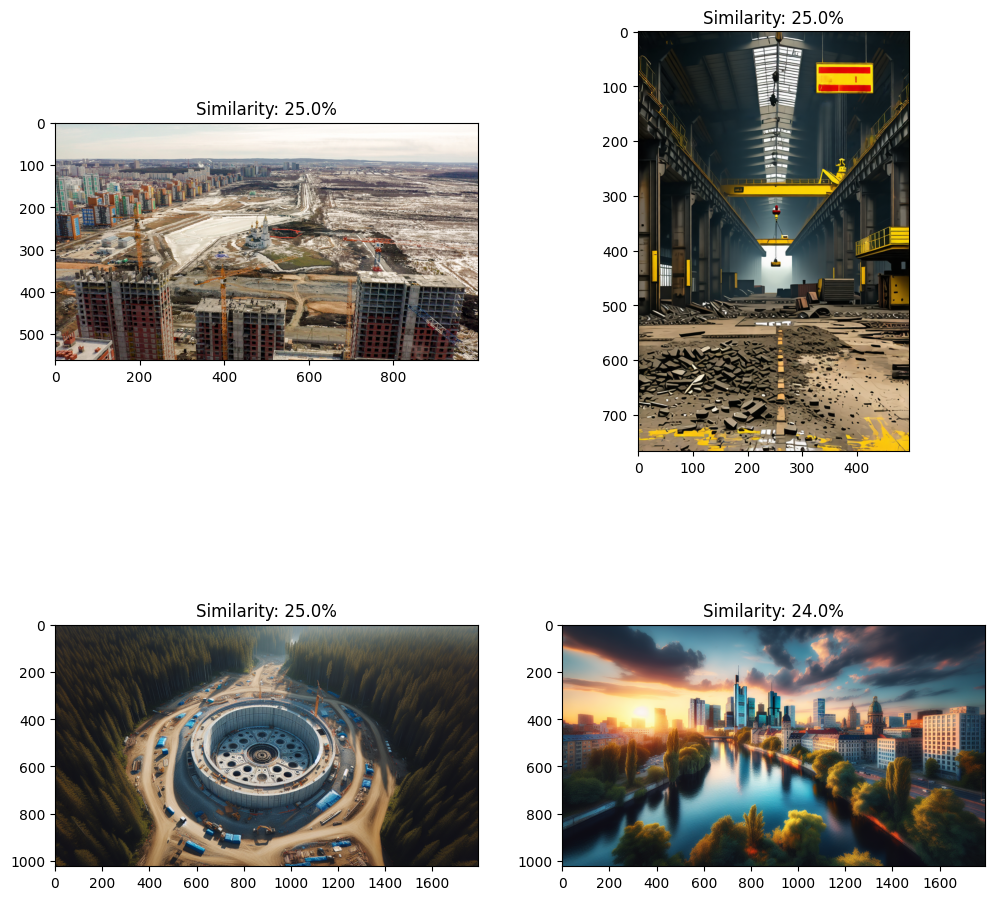

In [25]:
top_images = run("A city under construction")

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration


def get_blip_model_info(model_ID, device):
# Save the model to device
	model = BlipForConditionalGeneration.from_pretrained(model_ID)
 	# Get the processor
	processor = BlipProcessor.from_pretrained(model_ID)
    # Return model, processor & tokenizer
	return model, processor
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
# Define the model ID
model_ID = "Salesforce/blip-image-captioning-base"
# Get model, processor & tokenizer
blip_model, blip_processor = get_blip_model_info(model_ID, device)

In [27]:
def generate_caption(top_images):
    index_values = list(top_images.index.values)
    list_images = [top_images.iloc[idx].image for idx in index_values]
    captions = []
    for img in list_images:
        inputs = blip_processor(img, return_tensors="pt")
        output = blip_model.generate(**inputs)
        caption = blip_processor.decode(output[0], skip_special_tokens=True)
        captions.append(caption)
    return captions

out = generate_caption(top_images)

In [28]:
print(out)

['a large city', 'a scene of a factory', 'a large circular structure in the middle of a forest', 'a city with a river and a bridge']


In [31]:
from transformers import pipeline

pipe = pipeline("text-to-speech", model="suno/bark-small")
text = "[clears throat] This is a test ... and I just took a long pause."
output = pipe(text)

Device set to use cpu
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [32]:
from IPython.display import Audio
Audio(output["audio"], rate=output["sampling_rate"])